# Graphs for Paper

## Pt. 1: Visualizing ChIP-seq Data
We have a lot of ChIP-seq data. Let's take a look at what exactly it looks like.

In [1]:
import matplotlib.pyplot as plt
from threading import Thread
import numpy as np
import RELI as R
from RELI import RELI, LoadedData
import threading
R.DEBUG = False

In [6]:
# Get list of all the locations of these ChIP-seqs + plot all this
sample = "hg19_0697"
data = [list(range(int(line.split("\t")[1]), int(line.split("\t")[2]))) for line in open(F"sample_data/ChIP-seq/{sample}").readlines()]

In [11]:
new_data = []
for d in data:
    for dd in d:
        new_data.append(dd)
num_bins = int(len(set(new_data)) / 100)
new_data[:10], num_bins

([565184,
  565185,
  565186,
  565187,
  565188,
  565189,
  565190,
  565191,
  565192,
  565193],
 66493)

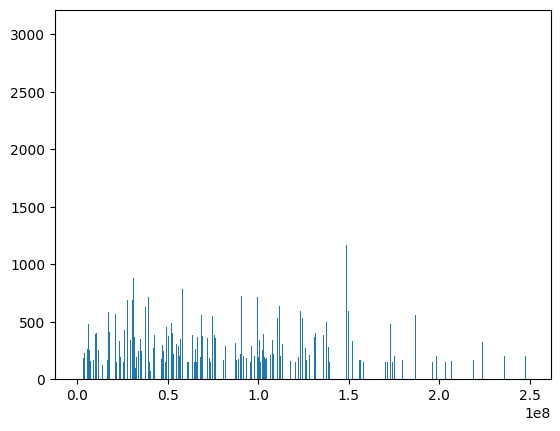

In [12]:
plt.hist(new_data, bins=num_bins)
plt.savefig(F"{sample}.png")
plt.show()

## Pt. 2: Run RELI on ALL Data
This will likely take several hours.

In [2]:
# We first load in the data we use for all the ChIP-seq files before beginning analysis.
data = LoadedData("SLE",
    "example/SLE_EU.snp",
    1000,
    "example/SLE_EU.ld",
    "sample_data/ChIPseq.index",
    given_species = "sample_data/GenomeBuild/hg19.txt")
data

Starting RELI:
	Seed: 1714010128
	SNP File: example/SLE_EU.snp


In [4]:
# Iterate over all the ChIP-seq options loaded in
# Number of threads we're going to use for processing
num_bins = 10

# Place these into 5 bins, where we will be performing multithreading
bins = []
chip_values = list(data.chip_seq_index.keys())
count = int(len(chip_values) / (num_bins - 1))
while len(chip_values) > 0:
    bins.append(chip_values[:count])
    del chip_values[:count]

bins, len(bins)

([['hg19_1540',
   'hg19_1543',
   'hg19_1544',
   'hg19_1541',
   'hg19_1542',
   'hg19_0314',
   'hg19_0343',
   'hg19_0412',
   'hg19_0514',
   'hg19_0706',
   'hg19_0775',
   'hg19_1080',
   'hg19_1177',
   'hg19_1223',
   'hg19_1484',
   'hg19_1180',
   'hg19_0808',
   'hg19_0340',
   'hg19_0101',
   'hg19_0370',
   'hg19_0417',
   'hg19_0881',
   'hg19_0811',
   'hg19_0115',
   'hg19_1371',
   'hg19_0102',
   'hg19_0103',
   'hg19_0344',
   'hg19_1485',
   'hg19_0342',
   'hg19_0407',
   'hg19_0452',
   'hg19_0773',
   'hg19_1077',
   'hg19_1081',
   'hg19_0451',
   'hg19_0809',
   'hg19_0810',
   'hg19_0425',
   'hg19_1413',
   'hg19_1057',
   'hg19_1466',
   'hg19_1467',
   'hg19_0044',
   'hg19_0311',
   'hg19_0325',
   'hg19_0337',
   'hg19_0405',
   'hg19_0512',
   'hg19_0653',
   'hg19_0697',
   'hg19_0768',
   'hg19_0836',
   'hg19_0857',
   'hg19_0866',
   'hg19_0928',
   'hg19_0952',
   'hg19_1221',
   'hg19_1314',
   'hg19_1414',
   'hg19_1478',
   'hg19_0929',
   'hg19

In [8]:
from multiprocessing import Process, Queue

# Now each of these bins will be handed off to a thread, which will deal with loading the data
def handle_bin(q, bin, thread_id):
    r = []
    for target in bin:
        print(F"Thread {thread_id} running on target {target}")
        r.append(RELI(data, target))
    q.put(r)


information = []
if __name__ == '__main__':
    print("Main line starting multithreading processes")
    threads = []
    queue_info = []
    for i, bin in enumerate(bins):
        q = Queue()
        results = [0 for _ in range(num_bins)]
        t = Process(target=handle_bin, args=[q, bin, i])
        threads.append(t)
        t.start()
    
    # Get RELI info from each thread
    for queue in queue_info:
        information.append(q.get())

    # Now join all the threads to the main thread
    for thread in threads:
        thread.join()


Main line starting multithreading processes


In [6]:
results

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]